<center>
<h1>Wizualizacja danych w języku Python</h1>
<h2>Ćwiczenia 3</h2>

</center>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
dane = pd.DataFrame({'Miesiąc': ["Styczeń","Luty","Marzec","Kwiecień","Maj","Czerwiec","Lipiec","Sierpień","Wrzesień","Październik","Listopad","Grudzień"],
                     'SmartTV': [159,187,245,151,181,160,142,217,152,143,157,175],
                     'TV': [159,187,246,151,181,150,134,149,131,105,129,142]})

### Wykres domyślny

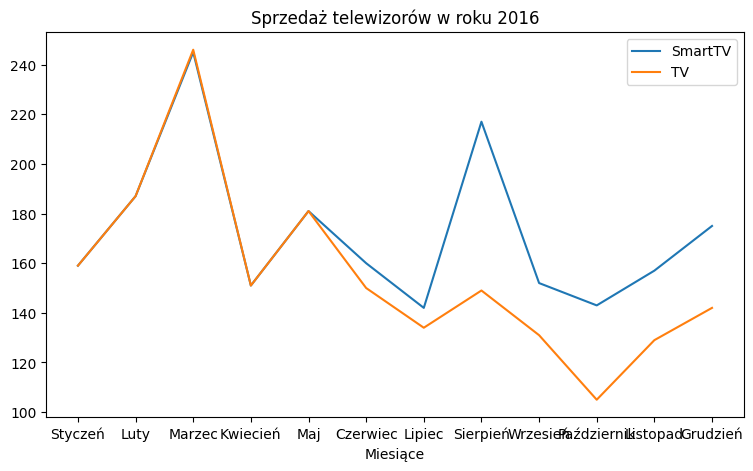

In [20]:
dane.plot(figsize=[9, 5])
plt.title("Sprzedaż telewizorów w roku 2016")
plt.xlabel("Miesiące")
plt.xticks(dane.index, dane.Miesiąc);

### Poprawienie wykresu zgodnie z regułami

##### 1. Usuń elementy nie wnoszące nic do zrozumienia prezentowanego problemu. Zastosuj:

- Prawo domykania
- FactorInk

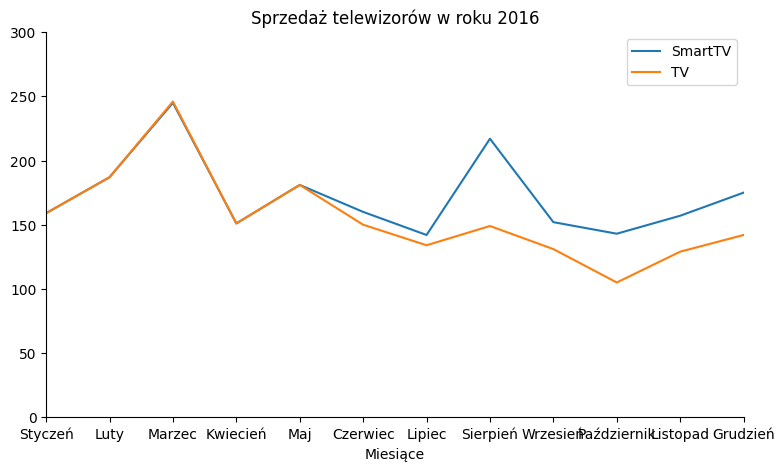

In [67]:
ax = dane.plot(figsize=[9, 5])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Sprzedaż telewizorów w roku 2016")
plt.xlabel("Miesiące")
plt.xticks(dane.index, dane['Miesiąc'])
plt.yticks(range(0, 301, 50))
plt.xlim([0, len(dane) - 1])
plt.show()

##### 2. Użyj najkrótszych jak to tylko możliwe etykiet danych, pozwól odbiorcy czytać "naturalnie". Zastosuj:

- Prawo kontynuacji



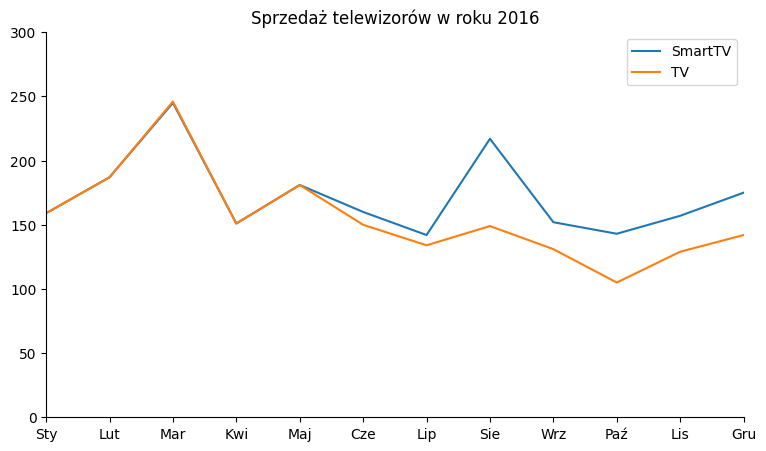

In [66]:
krotkie_nazwy = ["Sty", "Lut", "Mar", "Kwi", "Maj", "Cze", "Lip", "Sie", "Wrz", "Paź", "Lis", "Gru"]

ax = dane.plot(figsize=[9, 5])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Sprzedaż telewizorów w roku 2016")
plt.xticks(dane.index, krotkie_nazwy)
plt.yticks(range(0, 301, 50))
plt.xlim([0, len(dane) - 1])
plt.show()

##### 3. Usuń elementy rozpraszające (legendę). Zastosuj:

- Prawo bliskości
- Prawo podobieństwa

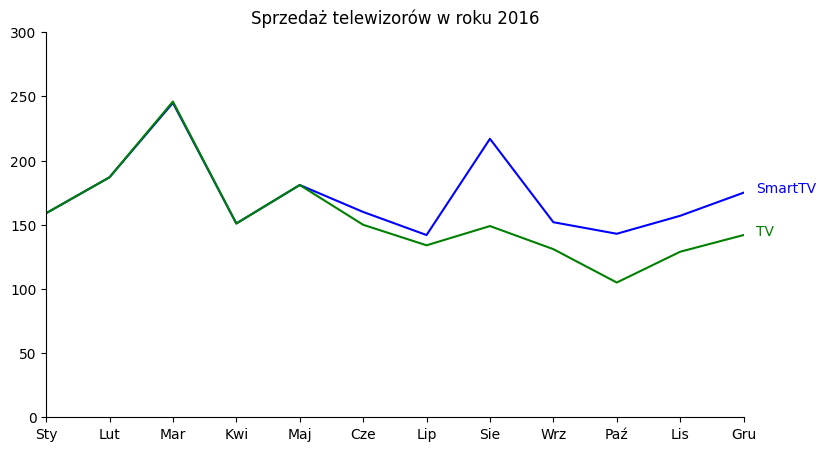

In [73]:
krotkie_nazwy = ["Sty", "Lut", "Mar", "Kwi", "Maj", "Cze", "Lip", "Sie", "Wrz", "Paź", "Lis", "Gru"]
kolory = ['blue', 'green']

ax = dane.plot(figsize=[9, 5], color=kolory)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend().set_visible(False)
plt.title("Sprzedaż telewizorów w roku 2016")
plt.xticks(dane.index, krotkie_nazwy)
plt.yticks(range(0, 301, 50))

# Labele linii na końcu
for nazwa_linii, linia, kolor in zip(dane.columns[1:], ax.lines, kolory):
    y = linia.get_ydata()[-1]
    ax.text(len(dane) - 0.8, y, nazwa_linii, color=kolor) 

plt.xlim([0, len(dane) - 1])
plt.show()


##### 4. Pomóż czytelnikowi zwrócić uwagę na istotne elementy. Pokaż mu to co chcesz żeby zobaczył.

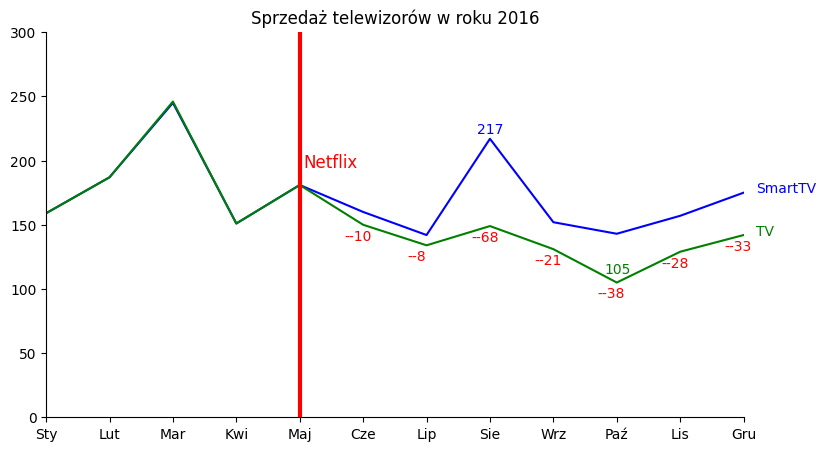

In [75]:
krotkie_nazwy = ["Sty", "Lut", "Mar", "Kwi", "Maj", "Cze", "Lip", "Sie", "Wrz", "Paź", "Lis", "Gru"]
kolory = ['blue', 'green']

ax = dane.plot(figsize=[9, 5], color=kolory)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend().set_visible(False)
plt.title("Sprzedaż telewizorów w roku 2016")
plt.xticks(dane.index, krotkie_nazwy)
plt.yticks(range(0, 301, 50))

# Labele linii na końcu
for nazwa_linii, linia, kolor in zip(dane.columns[1:], ax.lines, kolory):
    y = linia.get_ydata()[-1]
    ax.text(len(dane) - 0.8, y, nazwa_linii, color=kolor) 

# Max i min
for nazwa_linii, linia, kolor in zip(['SmartTV', 'TV'], ax.lines, kolory):
    if nazwa_linii == 'SmartTV':
        max_w = linia.get_ydata()[4:].max()
        max_m = linia.get_ydata()[4:].argmax() + 4
        ax.text(max_m - 0.2, max_w + 4, max_w, color=kolor)
    elif nazwa_linii == 'TV':
        min_w = linia.get_ydata()[4:].min()
        min_m = linia.get_ydata()[4:].argmin() + 4
        ax.text(min_m - 0.2, min_w + 7, min_w, color=kolor)

# linia netflix
netflix_miesiac = 'Maj'
netflix_pozycja = dane[dane['Miesiąc'] == netflix_miesiac].index[0]
ax.axvline(x=netflix_pozycja, color='red', linestyle='-', label='Netflix', linewidth=3)

y_min, y_max = ax.get_ylim()
y_centrum = (y_max + y_min + 90) / 2
ax.text(netflix_pozycja + 0.05, y_centrum, 'Netflix', color='red', fontsize=12)

# Straty tv do smartv
for i, row in dane[dane.index > netflix_pozycja].iterrows():
    roznica = row['TV'] - row['SmartTV']
    ax.text(i-0.3, row['TV'] - 12, f"-{roznica}", color='red', zorder=10)

plt.xlim([0, len(dane) - 1])
plt.show()